In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


#First, import files and packages, both the dataset and pandas and numpy
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

df = pd.read_csv(r"C:\Users\Ian's Second PC\Downloads\train.csv")
df.head()


Bad key text.latex.preview in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\IansSecondPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# In[2]:
#Capstone EDA
#These are additional statistics and basic analysis, looking into features of the dataset post-wrangling
def first_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Samples: %d,\nFeatures Count: %d,\nDuplicates: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))


In [3]:
first_EDA(df)
#Oddly enough, there are a large amount of null values, though these are 

Samples: 1460,
Features Count: 81,
Duplicates: 0,
Null Entries: 6965,
Number of Rows with Null Entries: 1460 100.0%


In [4]:
#Drop columns with large numbers of null values and measures that cannot be properly quantified.
df = df.drop("Alley", axis ='columns')
df = df.drop("Id", axis = 'columns')
df = df.drop("LandContour", axis = 'columns')
df = df.drop("MiscFeature", axis = 'columns') 
df = df.drop("MiscVal", axis = 'columns')
df = df.drop("PoolQC", axis = 'columns')
df = df.drop("Utilities", axis = 'columns')
df = df.drop("Fence", axis = 'columns')
df = df.drop('Street', axis = 'columns')
df = df.drop('LandSlope', axis = 'columns')
df = df.drop('MSZoning', axis = 'columns')
df = df.drop('LotShape', axis = 'columns')
df = df.drop('Condition1', axis = 'columns')
#This column will be dropped due to having fewer observations than the rest of the data
df = df.drop("LotFrontage", axis = 'columns')
df.head()

,MSSubClass,LotArea,LotConfig,Neighborhood,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,8450,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,9600,FR2,Veenker,Norm,1Fam,1Story,6,8,1976,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,11250,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,9550,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,14260,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
# In[3]:
#drop all rows with null values to normalize data.
df.dropna(axis='rows')
df.head()

,MSSubClass,LotArea,LotConfig,Neighborhood,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,8450,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,9600,FR2,Veenker,Norm,1Fam,1Story,6,8,1976,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,11250,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,9550,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,14260,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
# In[4]:


#Investigate the data to determine outliers; in this particular case, outliers may require further investigation
#as there may be a relationship other than linear with land, square footage, etc.
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

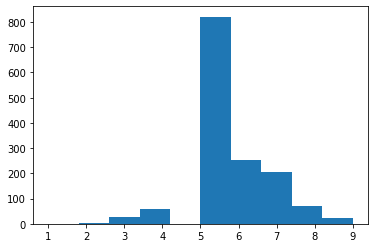

In [7]:
# In[5]:
#Visualize the data to identify trends
plt.hist(df['OverallCond'])
#Most House conditions tend towards the center, though not in a normal distribution, as scarcely any exist between 4 and 5 

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

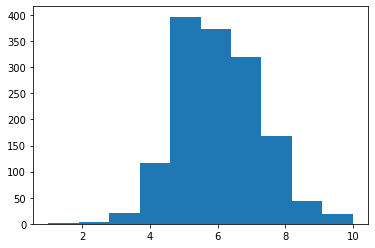

In [8]:
plt.hist(df['OverallQual'])
#Similarly average results here, with the peak at 5, but high numbers of houses at 6 and 7.

In [9]:
#As far as correlation goes, there are few strongly correlated variables, either in the positive or negative.
#When it comes to the correlated variables, the predictors of sale price are as expected. There is a strong correlation
#which is positive to sale price with high square footages, with lot area and square footage sticking out.
#Similarly, newer houses have a strong tendency to sell for more money, another intuitively true statement. 
#One odd finding is that a higher condition score is negatively correlated with price. It is possible that that score is 
#structured with one as the highest, however the histogram indicates this is unlikely, as there are no ones and several tens.
df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.034888,-0.041258,0.214479


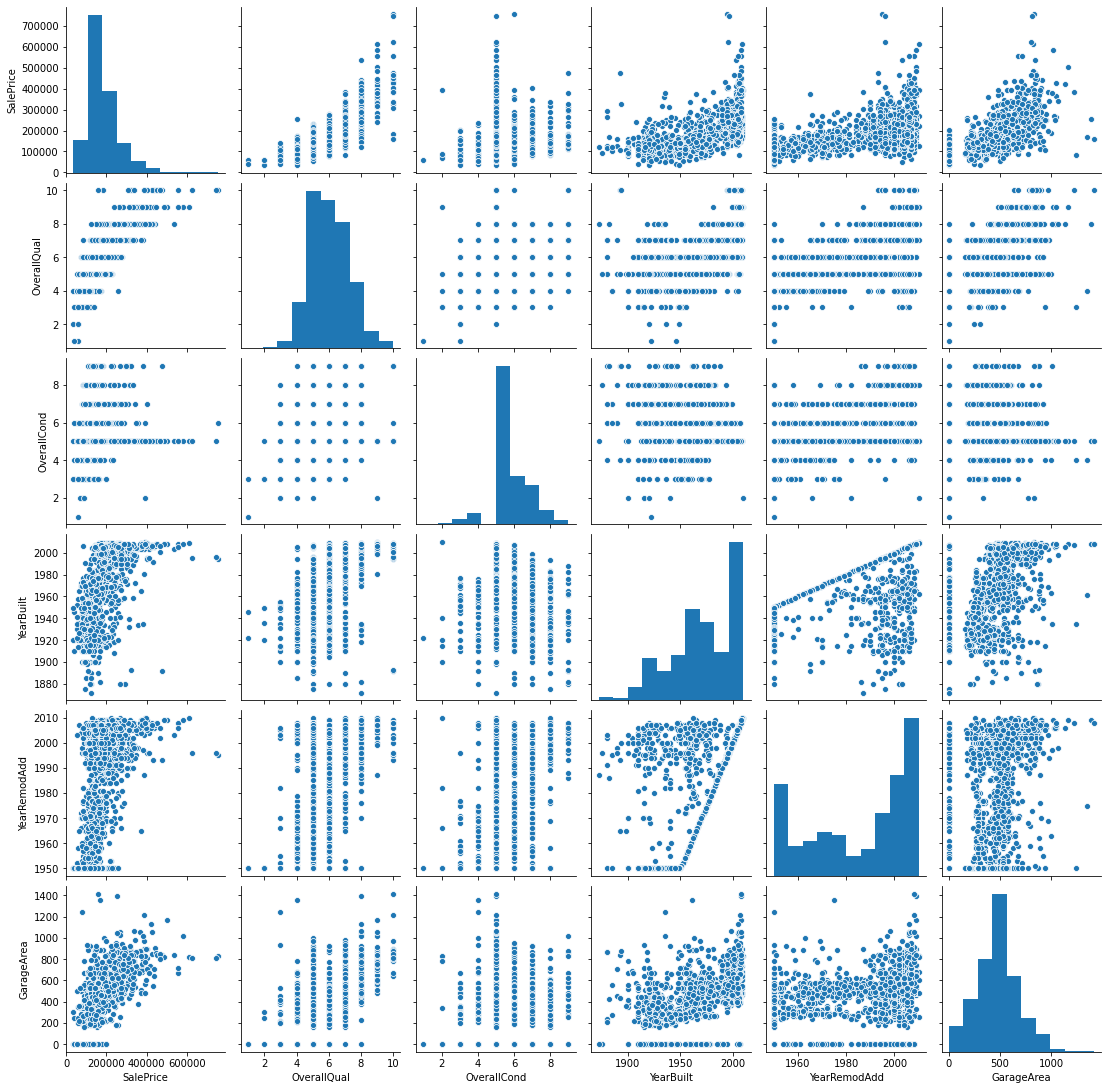

In [10]:
#Figure out dummies for basement finish
#Ask abt neighborhood situation (can there be quantitative measure?)
#Use only 4-6 most correlated variables to cut down on noise?
Essential = df[['SalePrice', 'OverallQual', 'OverallCond','YearBuilt','YearRemodAdd', 'GarageArea']]
sns.pairplot(Essential)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

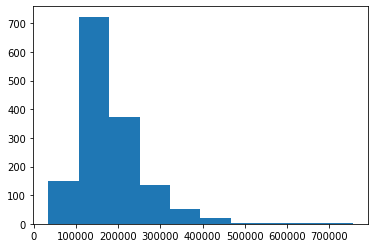

In [11]:
plt.hist(Essential['SalePrice'])

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

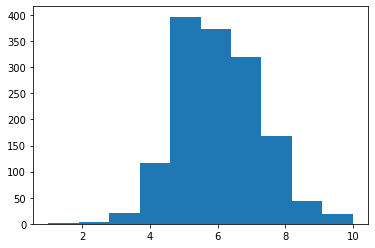

In [12]:
plt.hist(Essential['OverallQual'])

(array([  9.,   6.,  37., 122.,  83., 128., 261., 223., 139., 452.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

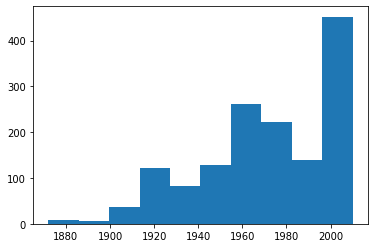

In [13]:
plt.hist(Essential['YearBuilt'])

(array([220.,  72.,  84., 106.,  98.,  48.,  64., 150., 241., 377.]),
 array([1950., 1956., 1962., 1968., 1974., 1980., 1986., 1992., 1998.,
        2004., 2010.]),
 <BarContainer object of 10 artists>)

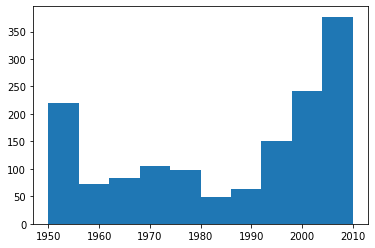

In [14]:
plt.hist(Essential['YearRemodAdd'])

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

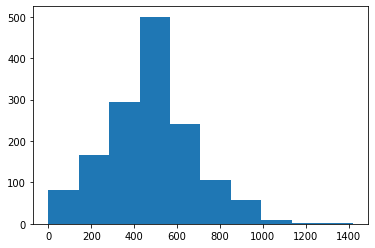

In [15]:
plt.hist(Essential['GarageArea'])

In [16]:
Remodel = []
for i in Essential['YearRemodAdd']:
    if i >= 2000:
        Dummy = 1
        Remodel.append(Dummy)
    else:
        Dummy = 0
        Remodel.append(Dummy)
Remodel
Essential['Remodled'] = Remodel
#Essential['Remodeled'] = pd.get_dummies(Essential['YearRemodAdd'] > 0)

C:\Users\IansSecondPC\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
Essential['Remodled']

0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    0
1457    1
1458    0
1459    0
Name: Remodled, Length: 1460, dtype: int64

In [18]:
scaler = preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(Essential)
scaled_df = pd.DataFrame(scaled_df)

In [19]:
X= Essential.drop(['SalePrice'],axis=1)
y = Essential['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   OverallCond   1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   YearRemodAdd  1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   Remodled      1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.003
Random Forest: f1-score=0.004


In [21]:
#Random Forest Accuracy is somewhat low, with the model's predictions being true at a rate of only 30% of 1%.
#Similarly, the f1 score, tracking both precision of the model and recall of observations, is lacking at 40% of 1%.
#This would suggest that in this heavily correlated dataset, the observational work is largely done, making a Random Forest
#Model largely unnecessary.

In [23]:
from sklearn import linear_model, preprocessing 
rModel = linear_model.LinearRegression(normalize=True)

In [25]:
rModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
print(rModel.score(X_train, y_train))

0.675342405776981


In [ ]:
#This is a fairly high R-Squared, showcasing a strong linear regression model, accounting for more than two thirds of
#variation, likely due to the deliberate selection of varialbes that correlated moderately well with the dependent
#variable SalePrice.

In [29]:
import statsmodels.api as sm 
rModel2 = sm.OLS(y_train, X_train) 
rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              3577.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                        0.00
Time:                        23:27:32   Log-Likelihood:                         -14170.
No. Observations:                1168   AIC:                                  2.835e+04
Df Residuals:                    1162   BIC:                                  2.838e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   3.508e+04   1262.717     27.778      0.000    3.26e+04    3.76e+04
OverallCond   2131.8603   1420.693      1.501      0.134    -655.550    4919.270
YearBuilt       54.4406     67.370      0.808      0.419     -77.741     186.622
YearRemodAdd  -102.5852     68.385     -1.500      0.134    -236.757      31.587
GarageArea     102.8681      7.680     13.395      0.000      87.801     117.935
Remodled      6917.0378   3054.384      2.265      0.024     924.312    1.29e+04
==============================================================================
Omnibus:                      494.284   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5941.508
Skew:                           1.615   Prob(JB):                         0.00
Kurtosis:                      13.567   Cond. No.                     6.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#While this model is promising in kind, it is also not without problems, as the model itself notes, the colinearity of 
#The associated dataframe may be too high, leading to an extremely large condition number. This may suggest a flaw in the 
#selection of variables, irrespective of the data itself.
#Assuming, however, the viability of the data, the linear regression model is fairly strong, with a high R-Squared
#As well as three standout variables as far as statistical significance, namely GarageArea, Remodeled, and YearBuilt. 
#For each, the effects, all strongly positive, follow fairly intuitively. A larger Garage, A more recent Remodel, or a
#House that is simply newer, is one that is more valuable to a potential buyer. From this, I reccommend that the real estate
#agency focus mainly on newer houses or houses restored in the last two decades
#as well as houses with ample storage space (garages being a solid proxy variable).

In [24]:
#A linear model, due to its lightweight nature and strong fit for this data, is still the preferred model, especially as the
#housing market analysis does not use time-series or forecasting. As more powerful models have actually proven less
#effective, the Linear OLS Model has proven the most efficient choice alongside the best fit.